# 1. Import Library

In [ ]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [ ]:
! mkdir data

# 資料準備

In [ ]:
train = pd.read_csv("sample_data/train.csv")
test = pd.read_csv("sample_data/test.csv")
all_df = pd.concat([train, test])

In [ ]:
cols=['Survived','Name','Pclass' ,'Sex', 'Age', 'SibSp',
      'Parch', 'Fare', 'Embarked']
all_df=all_df[cols]

In [ ]:
all_df.head()

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C
2,1.0,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S
4,0.0,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S


In [ ]:
train_df = all_df[all_df.Survived.notnull()]
test_df = all_df[~all_df.Survived.notnull()]

In [ ]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 891 test: 418


In [ ]:
def PreprocessData(raw_df):
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [ ]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_Features, train_Label, test_size = 0.25, random_state = 0)

# 3. Create Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [ ]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [ ]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                400       
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


# 4. Train model

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
train_history =model.fit(x=X_train, 
                         y=y_train, 
                         validation_split=0.1, 
                         epochs=50, 
                         batch_size=30,verbose=2)

Epoch 1/50
21/21 - 1s - loss: 0.6899 - accuracy: 0.6323 - val_loss: 0.6930 - val_accuracy: 0.4627 - 813ms/epoch - 39ms/step
Epoch 2/50
21/21 - 0s - loss: 0.6805 - accuracy: 0.6306 - val_loss: 0.6912 - val_accuracy: 0.4627 - 63ms/epoch - 3ms/step
Epoch 3/50
21/21 - 0s - loss: 0.6561 - accuracy: 0.6306 - val_loss: 0.6881 - val_accuracy: 0.4627 - 69ms/epoch - 3ms/step
Epoch 4/50
21/21 - 0s - loss: 0.6261 - accuracy: 0.6473 - val_loss: 0.6767 - val_accuracy: 0.4925 - 54ms/epoch - 3ms/step
Epoch 5/50
21/21 - 0s - loss: 0.5853 - accuracy: 0.6872 - val_loss: 0.6615 - val_accuracy: 0.5373 - 79ms/epoch - 4ms/step
Epoch 6/50
21/21 - 0s - loss: 0.5418 - accuracy: 0.7321 - val_loss: 0.6074 - val_accuracy: 0.6866 - 61ms/epoch - 3ms/step
Epoch 7/50
21/21 - 0s - loss: 0.5090 - accuracy: 0.8087 - val_loss: 0.5785 - val_accuracy: 0.7164 - 63ms/epoch - 3ms/step
Epoch 8/50
21/21 - 0s - loss: 0.4842 - accuracy: 0.8020 - val_loss: 0.5822 - val_accuracy: 0.7313 - 66ms/epoch - 3ms/step
Epoch 9/50
21/21 - 0s 

# 6. Print History

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

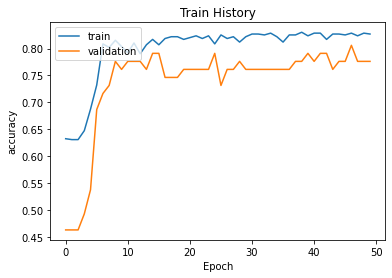

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

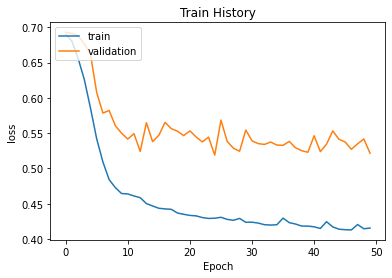

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x=X_test, 
                        y=y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8027


In [ ]:
scores[1]

0.8026905655860901

# 預測資料

# 加入Jack & Rose資料

In [ ]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [ ]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['Survived', 'Name','Pclass', 'Sex', 
                   'Age', 'SibSp','Parch', 'Fare','Embarked'])

In [ ]:
new_df = pd.concat([train_df,JR_df])

In [ ]:
new_df[-2:]

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,Jack,3,male,23.0,1,0,5.0,S
1,1.0,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [ ]:
new_Features,Label = PreprocessData(new_df)

In [ ]:
new_probability=model.predict(new_Features)

In [ ]:
new_probability[:10]

array([[0.11868688],
       [0.9807348 ],
       [0.52448255],
       [0.9725553 ],
       [0.10516286],
       [0.07557613],
       [0.23777327],
       [0.14841753],
       [0.47183543],
       [0.92635894]], dtype=float32)

In [ ]:
new = new_df.copy()
new.insert(len(new_df.columns),
          'probability',new_probability)

# 預測Jack & Rose資料的生存機率

In [ ]:
new[-2:]

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probability
0,0.0,Jack,3,male,23.0,1,0,5.0,S,0.115987
1,1.0,Rose,1,female,20.0,1,0,100.0,S,0.977814


# 查看生存機率高，卻沒有存活

In [ ]:
new[(new['Survived']==0) &  (new['probability']>0.9)]

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probability
177,0.0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.982309
199,0.0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",2,female,24.0,0,0,13.0000,S,0.901696
297,0.0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.977145
498,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.975840


In [ ]:
new[:5]

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probability
0,0.0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,S,0.118687
1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,C,0.980735
2,1.0,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,S,0.524483
3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,S,0.972555
4,0.0,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,S,0.105163
